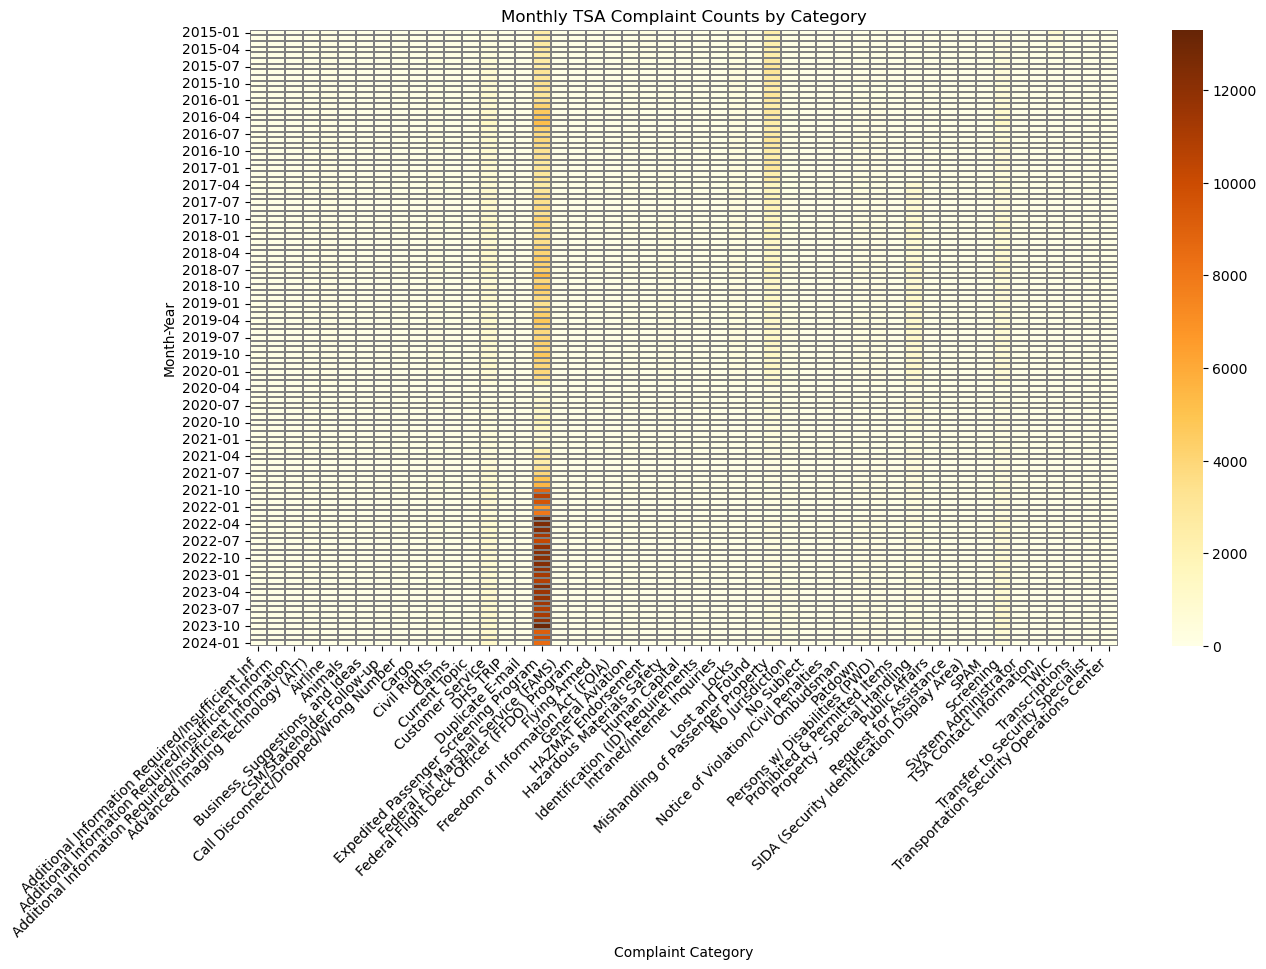

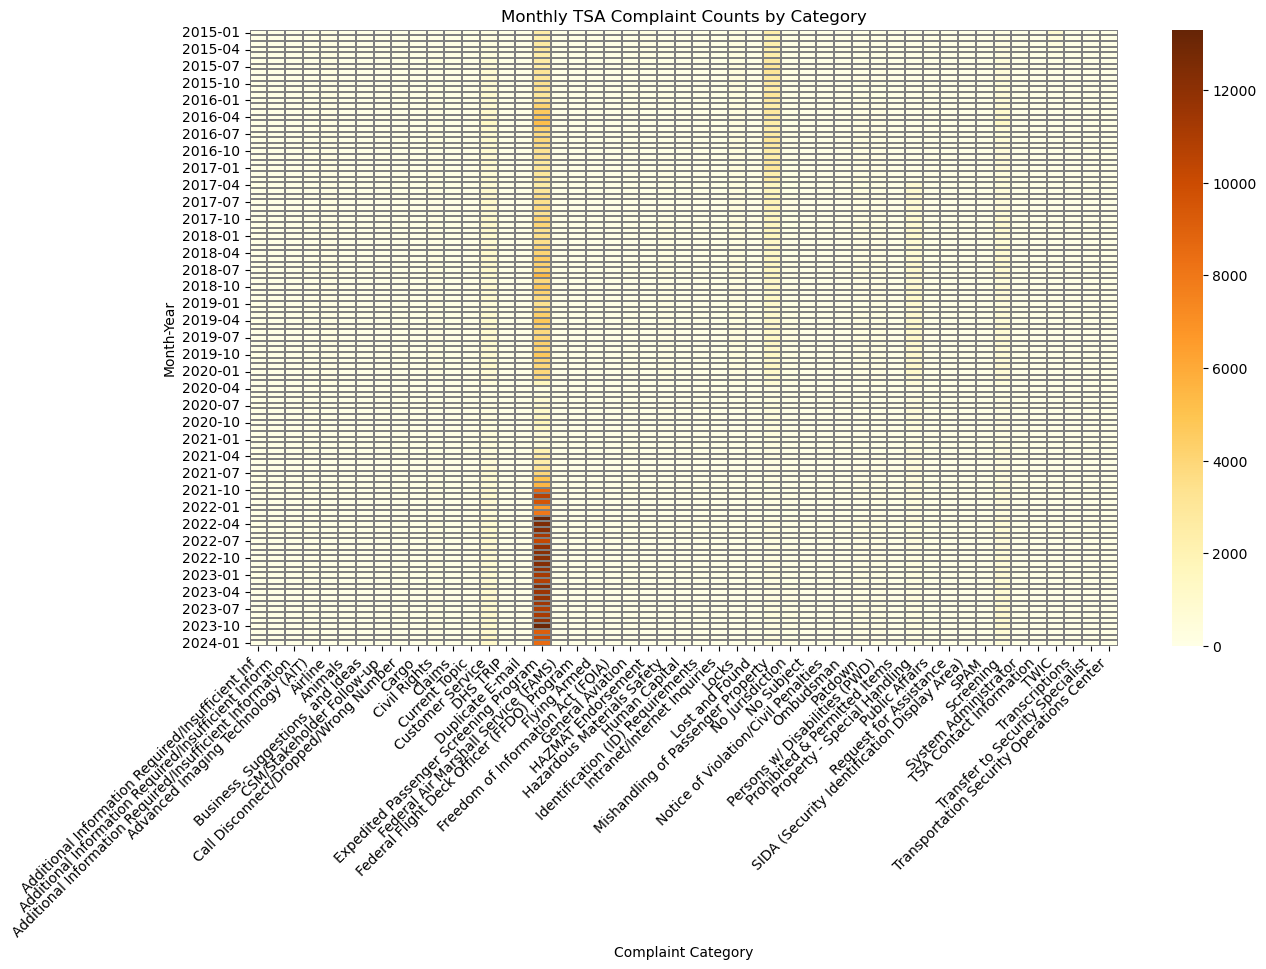

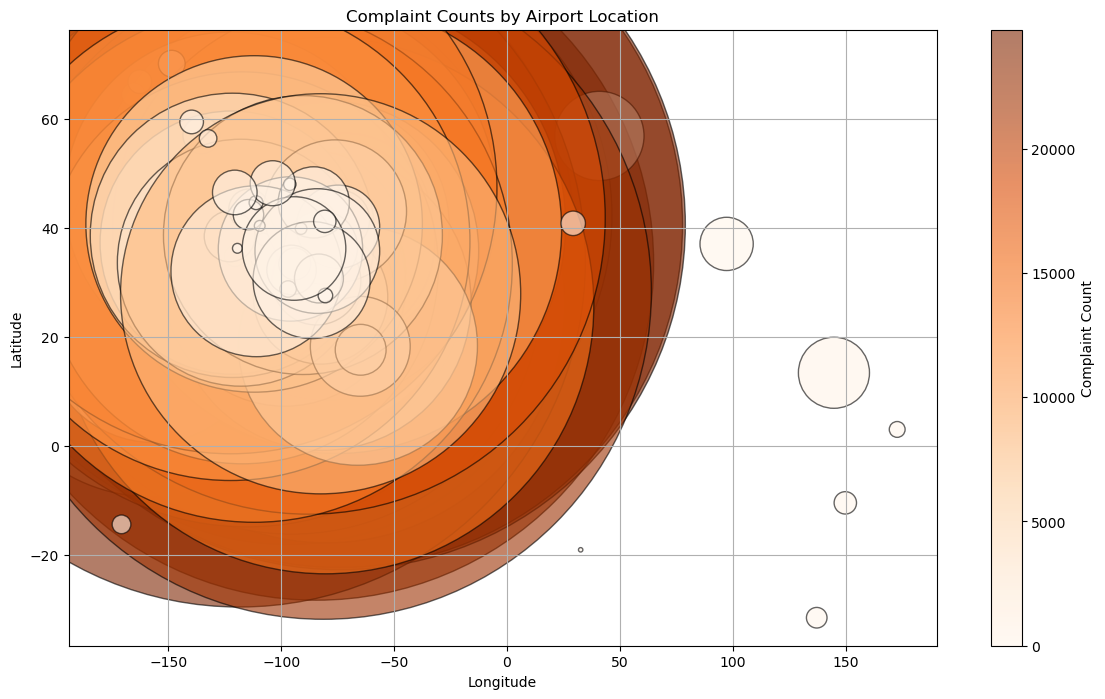

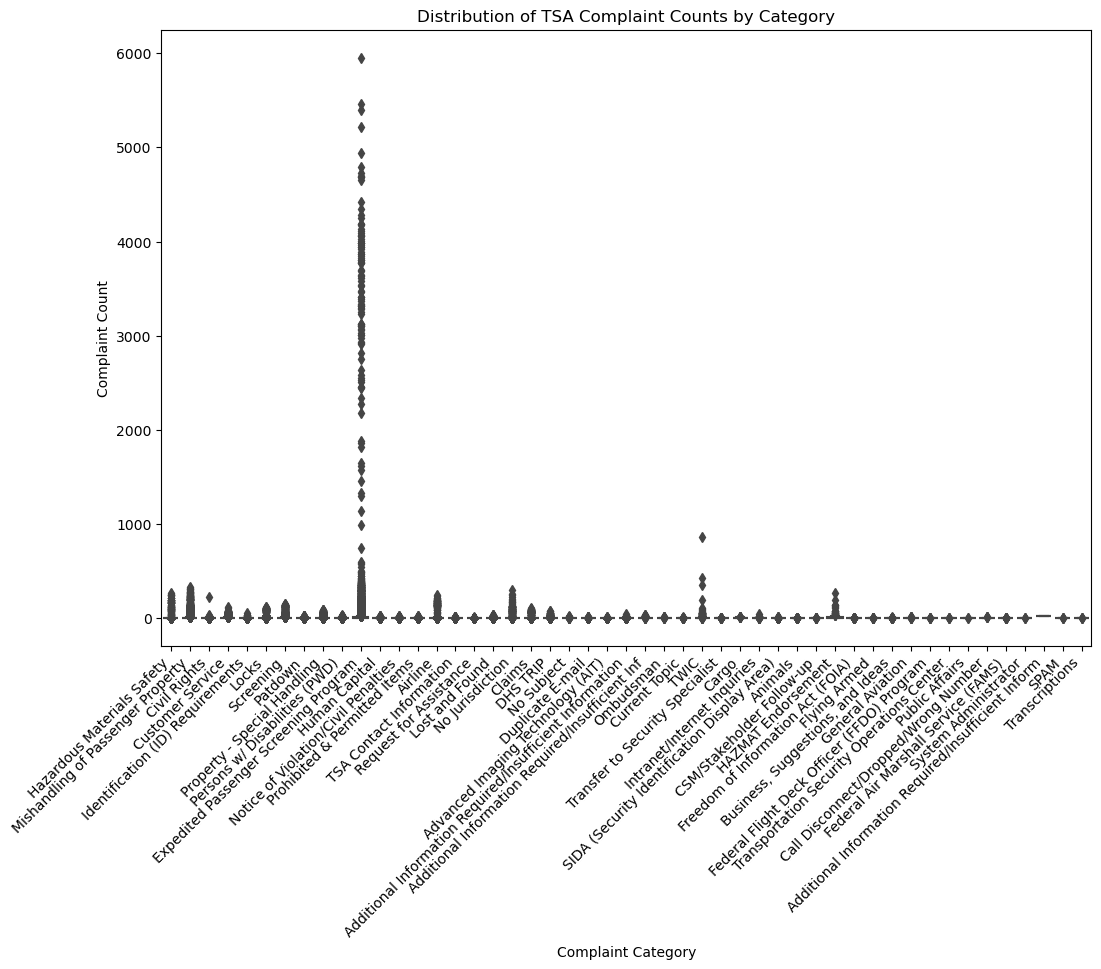

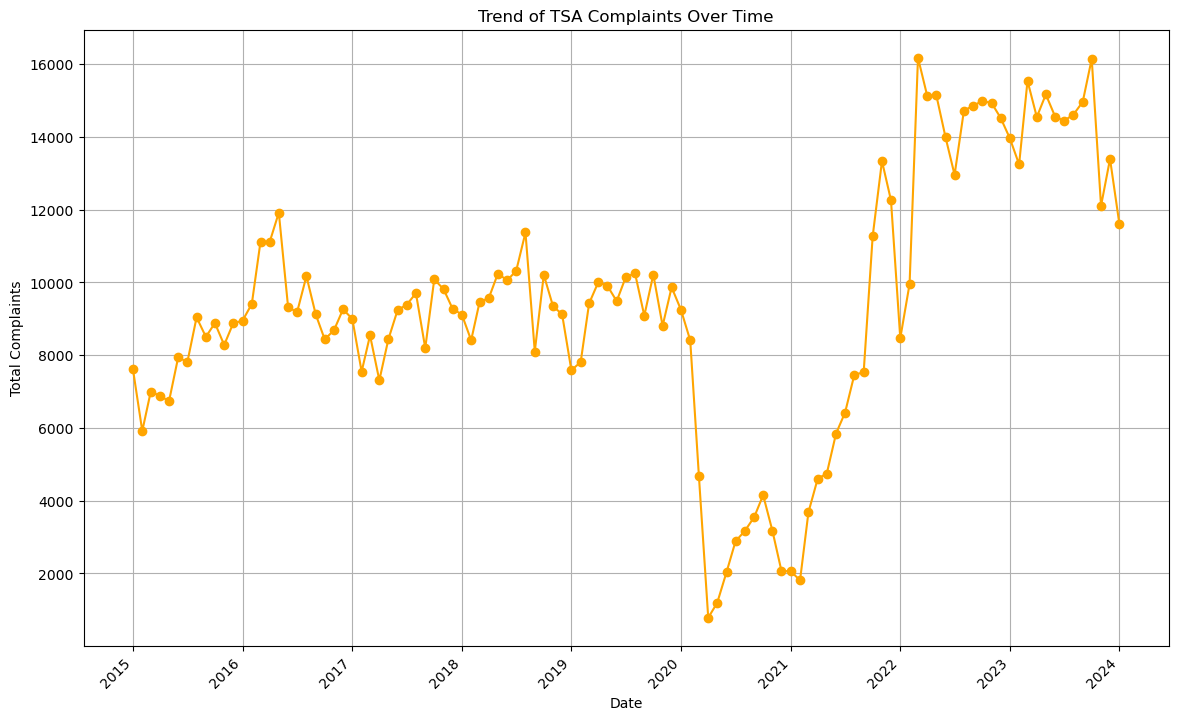

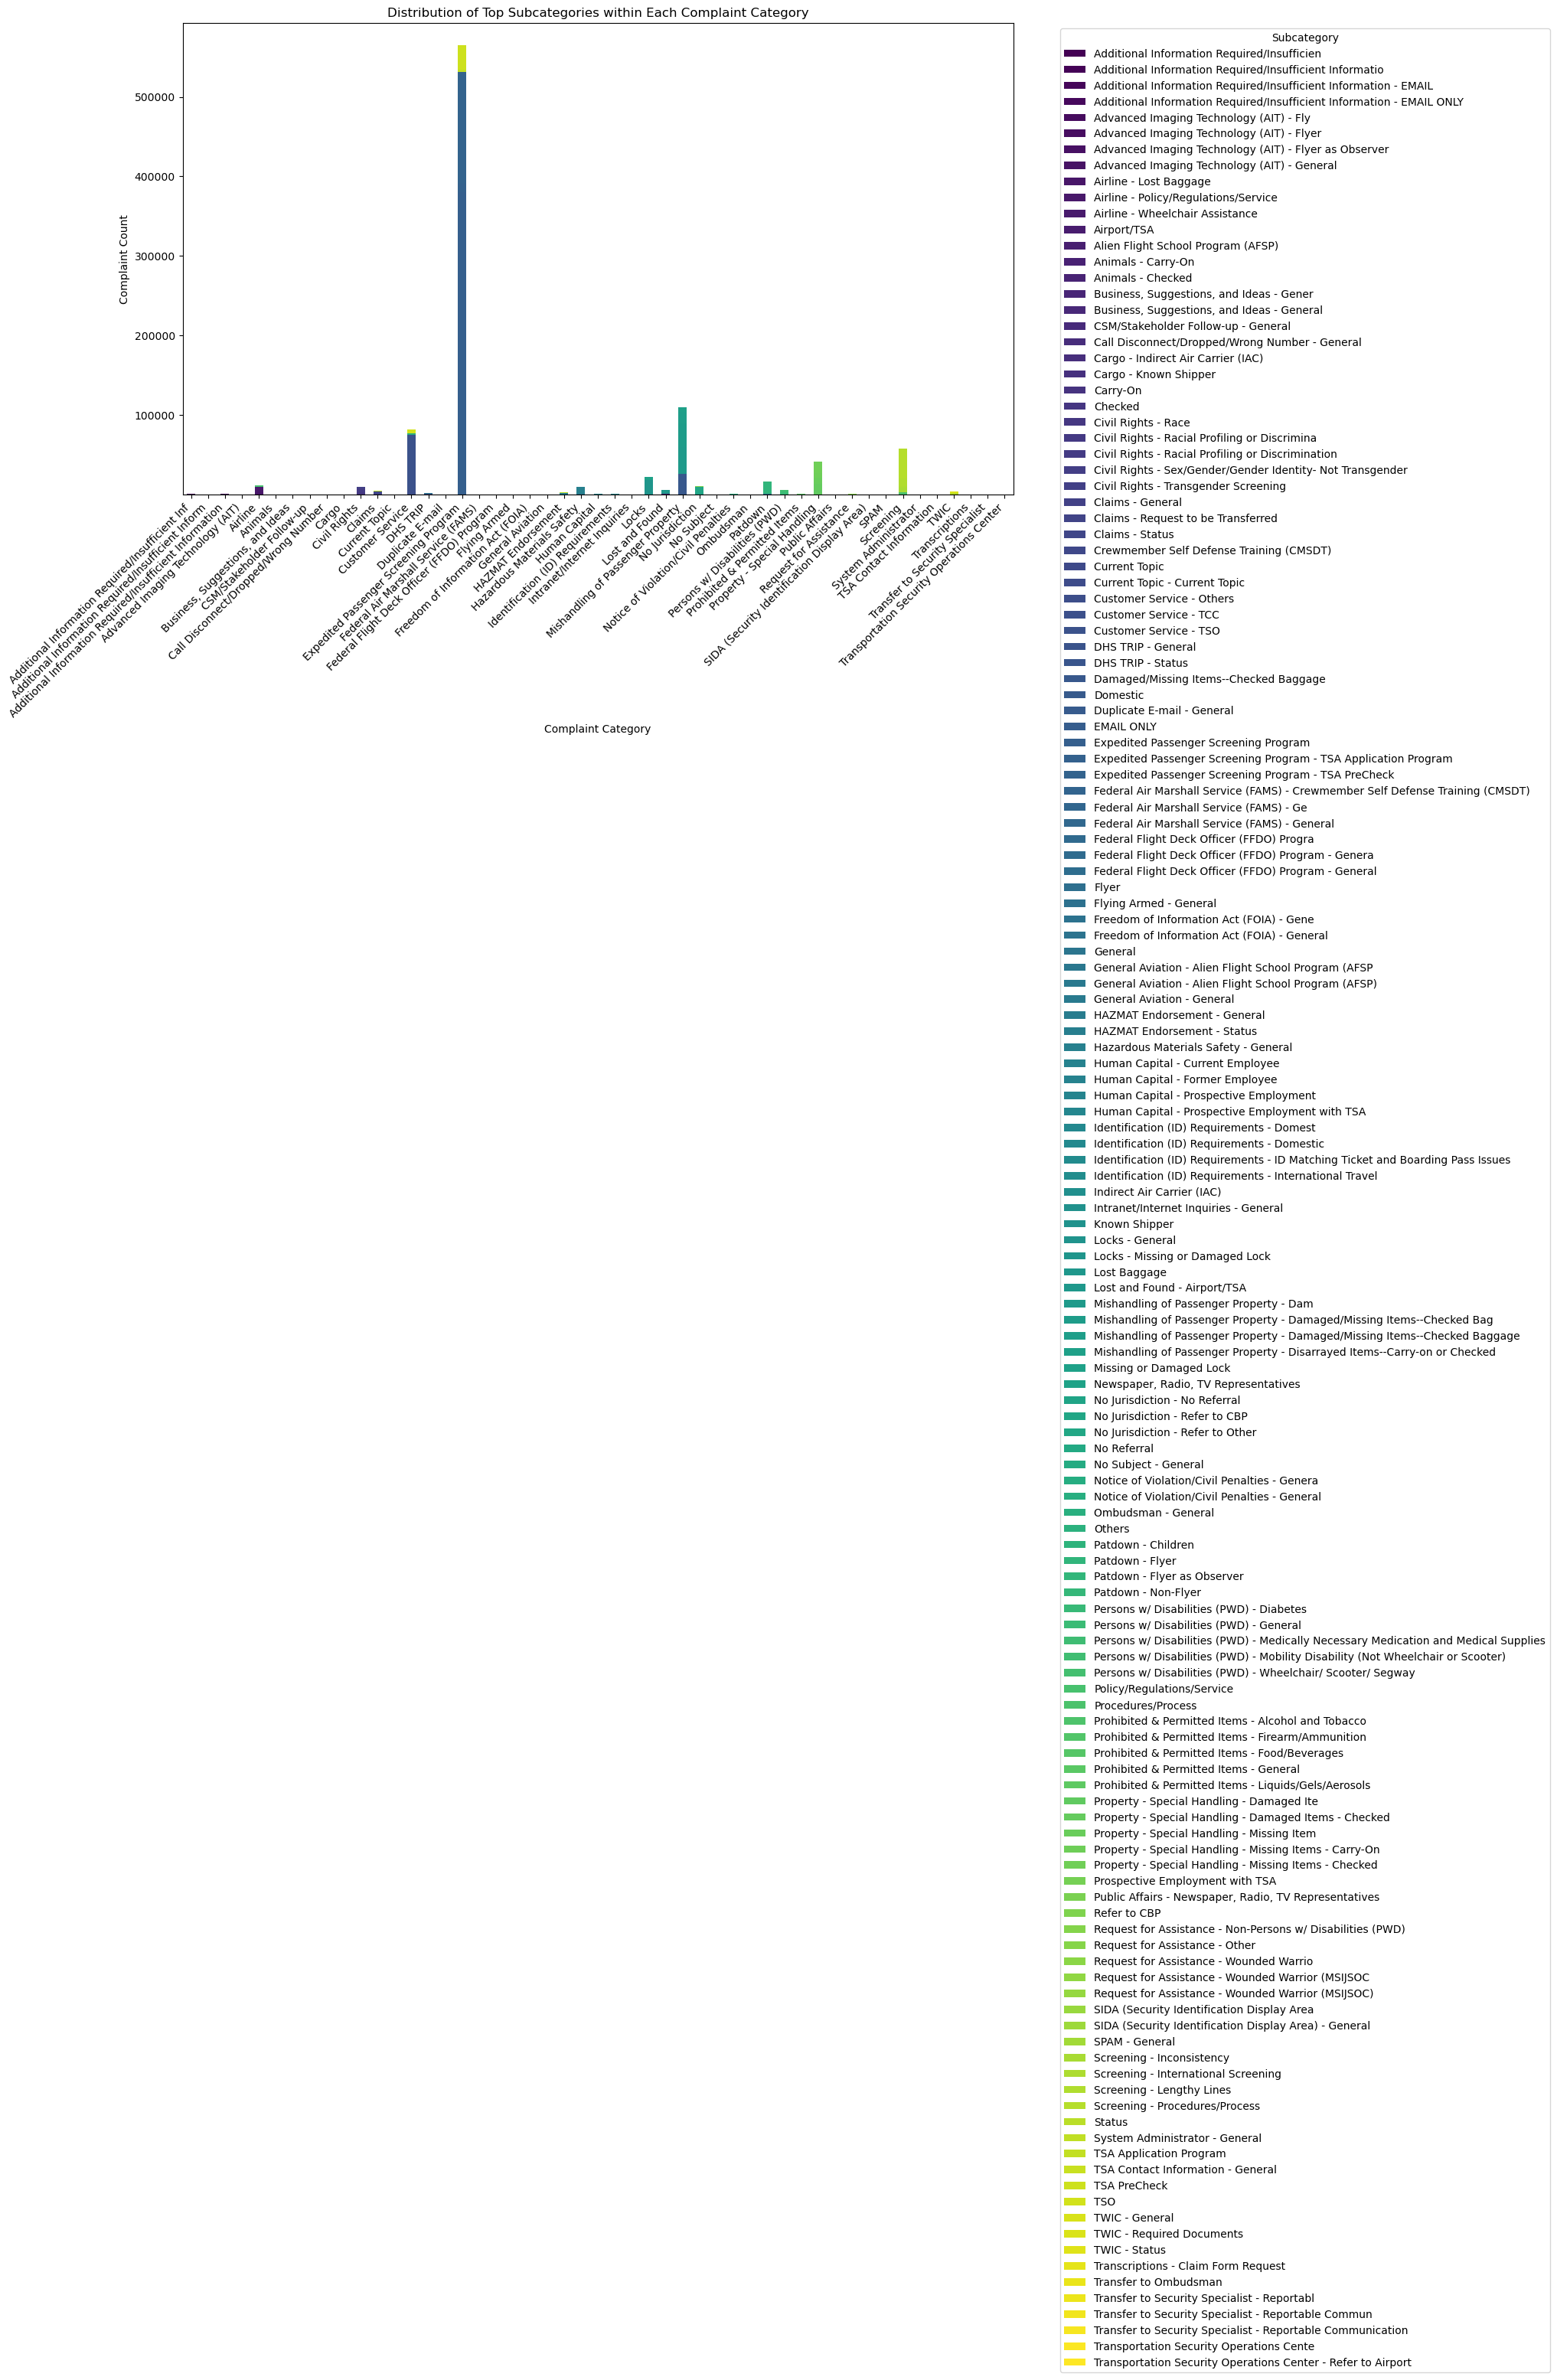

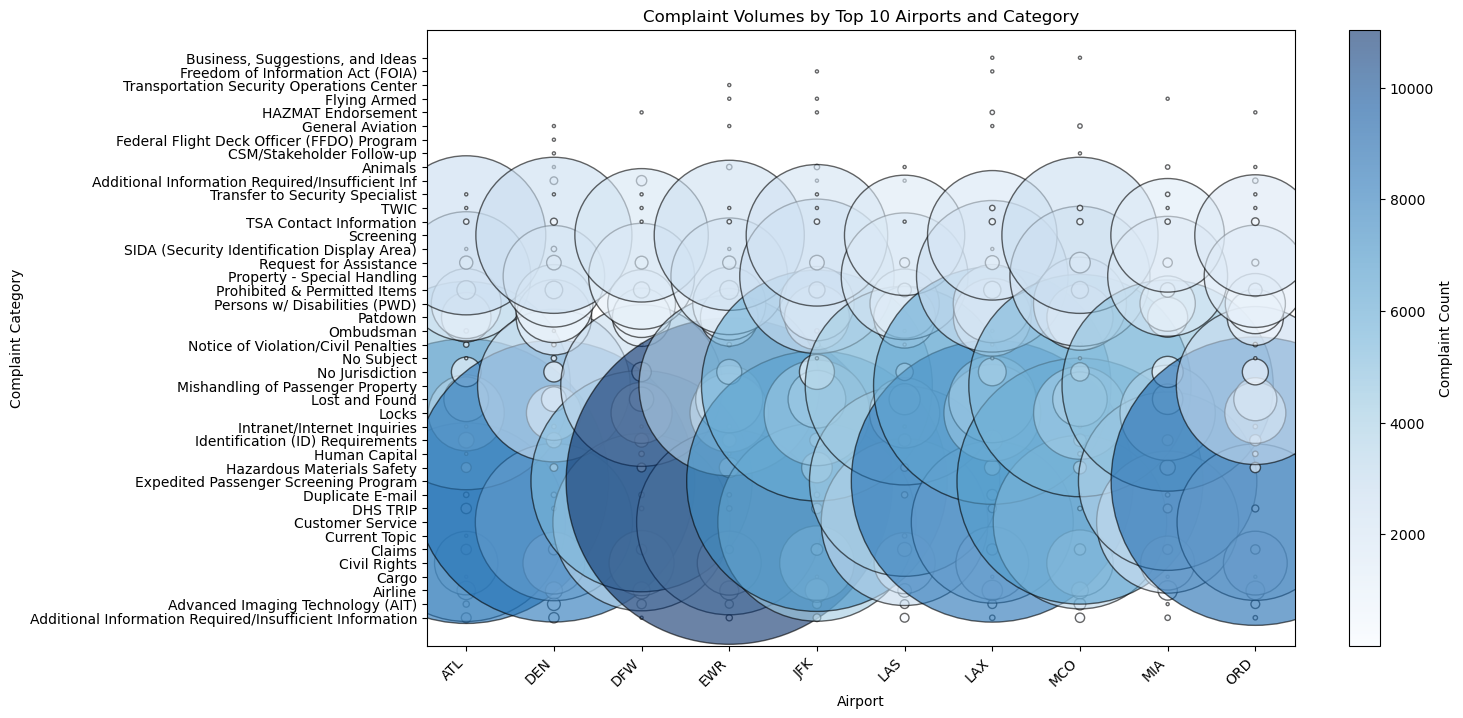

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the datasets
complaints_by_airport = pd.read_csv('/Users/shadinchatila/Downloads/complaints-by-airport.csv')
complaints_by_category = pd.read_csv('/Users/shadinchatila/Downloads/complaints-by-category.csv')
complaints_by_subcategory = pd.read_csv('/Users/shadinchatila/Downloads/complaints-by-subcategory.csv')
iata_icao = pd.read_csv('/Users/shadinchatila/Downloads/iata-icao.csv')

# Merge complaints data with IATA/ICAO
complaints_by_airport_merged = complaints_by_airport.merge(iata_icao[['iata', 'airport', 'latitude', 'longitude']], 
                                                           left_on='airport', right_on='iata', how='left')

# Prepare the data for the heat map visualization
complaints_by_category['year_month'] = pd.to_datetime(complaints_by_category['year_month'])
category_monthly_complaints = complaints_by_category.groupby(
    [complaints_by_category['year_month'].dt.to_period("M"), 'category']
)['count'].sum().unstack().fillna(0)

# Heatmap of Monthly Complaint Counts by Category
plt.figure(figsize=(14, 8))
sns.heatmap(category_monthly_complaints, cmap="YlOrBr", linewidths=0.3, linecolor='gray')
plt.title("Monthly TSA Complaint Counts by Category")
plt.xlabel("Complaint Category")
plt.ylabel("Month-Year")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Prepare the data for the heat map visualization
complaints_by_category['year_month'] = pd.to_datetime(complaints_by_category['year_month'])
category_monthly_complaints = complaints_by_category.groupby(
    [complaints_by_category['year_month'].dt.to_period("M"), 'category']
)['count'].sum().unstack().fillna(0)

# Heatmap of Monthly Complaint Counts by Category
plt.figure(figsize=(14, 8))
sns.heatmap(category_monthly_complaints, cmap="YlOrBr", linewidths=0.3, linecolor='gray')
plt.title("Monthly TSA Complaint Counts by Category")
plt.xlabel("Complaint Category")
plt.ylabel("Month-Year")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Rename the 'airport' column in complaints_by_airport to avoid issues when merging
complaints_by_airport = complaints_by_airport.rename(columns={'airport': 'airport_code'})

# Merge complaints_by_airport and iata_icao
airport_complaints = complaints_by_airport.merge(
    iata_icao[['iata', 'airport', 'latitude', 'longitude']], 
    left_on="airport_code", right_on="iata", how="left"
).groupby(["airport_code", "latitude", "longitude"])["count"].sum().reset_index()

# Scatter plot for complaints by airport location
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    airport_complaints['longitude'], airport_complaints['latitude'], 
    s=airport_complaints['count'] * 10, alpha=0.6, c=airport_complaints['count'], 
    cmap='Oranges', edgecolor='k', marker='o'
)
plt.colorbar(scatter, label='Complaint Count')
plt.title("Complaint Counts by Airport Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Box plot of complaint counts by category
plt.figure(figsize=(12, 8))
sns.boxplot(data=complaints_by_category, x='category', y='count')
plt.title("Distribution of TSA Complaint Counts by Category")
plt.xlabel("Complaint Category")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45, ha='right')
plt.show()


# Convert 'year_month' to datetime format for plotting purposes
complaints_by_airport['year_month'] = pd.to_datetime(complaints_by_airport['year_month'])

# Aggregate total complaints by month across all airports
monthly_complaints = complaints_by_airport.groupby('year_month')['count'].sum().reset_index()

# Line plot to show the trend of complaints over time
plt.figure(figsize=(14, 8))
plt.plot(monthly_complaints['year_month'], monthly_complaints['count'], color='orange', marker='o')
plt.title("Trend of TSA Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Total Complaints")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


# Define the number of top subcategories to show per category
top_subscribers = 5

# Group and filter to get top subcategories 
top_subcategories = (complaints_by_subcategory.groupby(['category', 'subcategory'])['count']
                     .sum()
                     .groupby(level=0, group_keys=False)
                     .nlargest(top_subscribers)
                     .reset_index())

# Pivot the data for plotting
filtered_subcategory_complaints = top_subcategories.pivot(index='category', columns='subcategory', values='count').fillna(0)

# Plot stacked bar chart of complaints by category and filtered top subcategories
filtered_subcategory_complaints.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Distribution of Top Subcategories within Each Complaint Category")
plt.xlabel("Complaint Category")
plt.ylabel("Complaint Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Aggregate complaint counts by airport and category
airport_category_complaints = complaints_by_category.groupby(['airport', 'category'])['count'].sum().reset_index()

# Filter for high-complaint (top 10) airports to reduce clutter and provide a clearer visual
top_airports = airport_category_complaints.groupby('airport')['count'].sum().nlargest(10).index
filtered_data = airport_category_complaints[airport_category_complaints['airport'].isin(top_airports)]

# Plot bubble chart for top complaint airports and categories
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    filtered_data['airport'], 
    filtered_data['category'], 
    s=filtered_data['count'] * 5, 
    alpha=0.6, 
    c=filtered_data['count'], 
    cmap='Blues', 
    edgecolor='k'
)
plt.colorbar(bubble, label='Complaint Count')
plt.title("Complaint Volumes by Top 10 Airports and Category")
plt.xlabel("Airport")
plt.ylabel("Complaint Category")
plt.xticks(rotation=45, ha='right')
plt.savefig('tsa_complaints_bubble_chart_filtered.png')
plt.show()



